## Machine Learning Supervised

So far, we have focused on using KNN as our model to predict California housing prices. However, there are other models worth exploring. Today, we will experiment with both simple Linear Regression and Decision Trees to understand how they explain our target variable. In machine learning, we typically choose our model based on the relationship between our features and the target variable, or simply by selecting the model with the higher score

Yesterday, we applied some feature engineering techniques, and our model indeed increased its performance. Now, let's see how Linear Regression and Decision Tree perform when we apply the same feature engineering techniques.

#### Loading and preparing the data

In [1]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

In [2]:
california = fetch_california_housing()

df_cali = pd.DataFrame(california['data'], columns = california['feature_names'])
df_cali['median_house_value'] = california['target']

df_cali.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#your code here

#### Normalization & Feature Selection

Like we did in Feature Engineering lesson, we are going to normalize our data and select a subset of columns as our features.

#### Train Test Split

In [4]:
features = df_cali.drop(columns = ["median_house_value", "Population", "AveOccup", "AveBedrms"])
target = df_cali["median_house_value"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

Create an instance of the normalizer

In [6]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns = X_train.columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns = X_test.columns)

display(X_train_norm.head())


,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,0.257838,0.098039,0.048751,0.137088,0.677291
1,0.268265,1.000000,0.031762,0.551541,0.190239
2,0.236783,0.490196,0.027097,0.137088,0.632470
3,0.066578,0.725490,0.017987,0.156217,0.606574
4,0.184591,1.000000,0.023207,0.163656,0.596614


## Linear Regression

Let's create an instance of Linear Regression model.

In [7]:
linear_reg = LinearRegression()

Training Linear Regression with our normalized data

In [8]:
linear_reg.fit(X_train_norm, y_train)

LinearRegression()

Evaluate model's performance

In [9]:
pred = linear_reg.predict(X_test_norm)

print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", r2_score(y_test, pred))
print("MAE", mean_absolute_error(pred, y_test))

RMSE 0.7424116296739353
R2 score 0.5773051453722333
MAE 0.5478401831409732


/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [10]:
df_compare = pd.DataFrame(pred, columns = ['pred'])
df_compare['y_true'] = y_test.values

df_compare['abs_diff'] = abs(df_compare['pred'] - df_compare['y_true'])

df_compare.head(30)

,pred,y_true,abs_diff
0,2.337576,1.369,0.968576
1,2.862364,2.413,0.449364
2,1.936865,2.007,0.070135
3,0.883635,0.725,0.158635
4,2.779784,4.600,1.820216
5,2.047393,1.200,0.847393
6,3.044740,2.470,0.574740
7,3.060313,3.369,0.308687
8,2.988048,3.397,0.408952
9,2.465144,2.656,0.190856


In [11]:
df_compare['abs_diff'].sum()/len(df_compare['pred'])  ## mean absolute error

0.5478401831409732

Linear Regression yielding a worse score than our previous model, KNN.

In Linear Regression, we often assess feature importance by examining the coefficients in the model. These coefficients indicate the impact of each feature on the model's predictions.

- Determine the coefficients (β) in the linear regression equation corresponding to each feature.
- The magnitude of these coefficients reflects the relative importance of the features. **Greater absolute values suggest more substantial impacts.**

In [12]:
linear_reg.coef_

array([ 5.38464606,  0.49426223,  2.47710724, -4.29392732, -4.66045731])

In [13]:
{feature:coef for feature, coef in zip(X_train_norm.columns, linear_reg.coef_)}

{'MedInc': 5.384646061206897,
 'HouseAge': 0.49426222880241255,
 'AveRooms': 2.4771072369823153,
 'Latitude': -4.293927324319665,
 'Longitude': -4.660457306574649}

We can conclude that **Median Income** have the highest impact in our model.

## Decision Tree

So far between KNN and Liner Regression, the first yield a better score, let's see how a Decision Tree performs.

- Initialize a Decision Tree instance

- Setting max_depth as 10, this means we will allow our tree to split 10 times

In [14]:
tree = DecisionTreeRegressor(max_depth=10)

- Training the model

In [15]:
tree.fit(X_train_norm, y_train)

DecisionTreeRegressor(max_depth=10)

- Evaluate the model

In [16]:
pred = tree.predict(X_test_norm)

print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("MAE", mean_absolute_error(pred, y_test))
print("R2 score", r2_score(y_test, pred))

RMSE 0.6297140410478999
MAE 0.4234717604784419
R2 score 0.6958945644600592


/Users/aruzhanakbayeva/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Often we check what are the most relevant features, like we did before in Linear Regression.

In [17]:
display(tree.feature_importances_)
{feature:coef for feature, coef in zip(X_train_norm.columns, tree.feature_importances_)}

array([0.62166444, 0.05914718, 0.04576072, 0.13997951, 0.13344814])

{'MedInc': 0.6216644386854763,
 'HouseAge': 0.059147183089116075,
 'AveRooms': 0.04576072493202214,
 'Latitude': 0.1399795120799032,
 'Longitude': 0.1334481412134822}

In [18]:
#your code here


A bit overwhelming to see, let's use graphviz library.

**Note**: you will need to install graphivz - pip install graphviz

- We will train a decision tree, in this case with max_depth=2 to better see the diagram

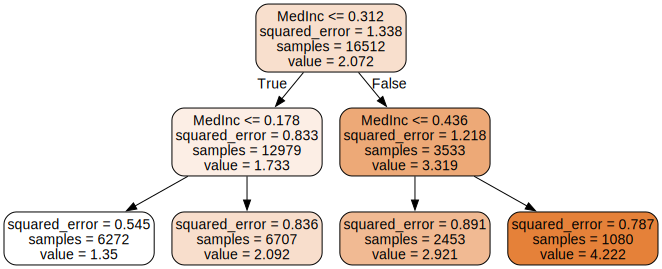

In [19]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_norm, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train_norm.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)